# How Random Forest Performs So Well?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

### In case of classification 

In [2]:
np.random.seed(42)

In [3]:
X,y = make_circles(n_samples=500, factor = 0.1, noise = 0.35, random_state=42)

In [4]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

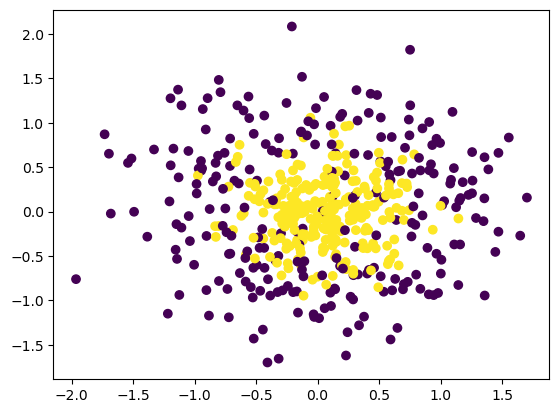

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Text(0.5, 1.0, 'Decision Tree')

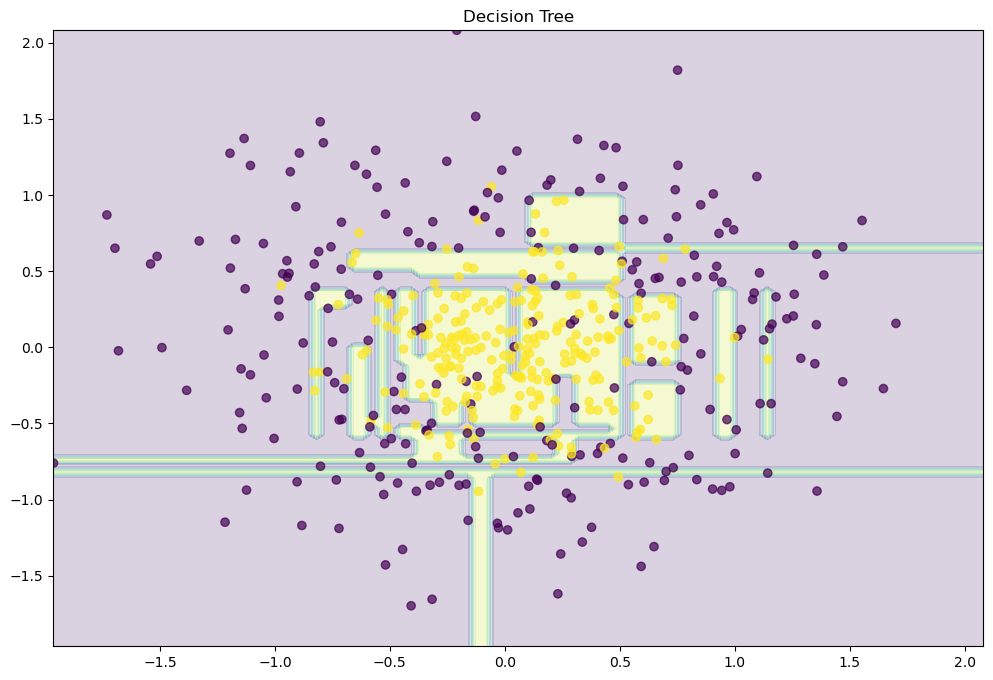

In [13]:
plt.figure(figsize=(12,8))
x_range= np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'viridis', alpha=0.7)
plt.title('Decision Tree')

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

Text(0.5, 1.0, 'Random Forest')

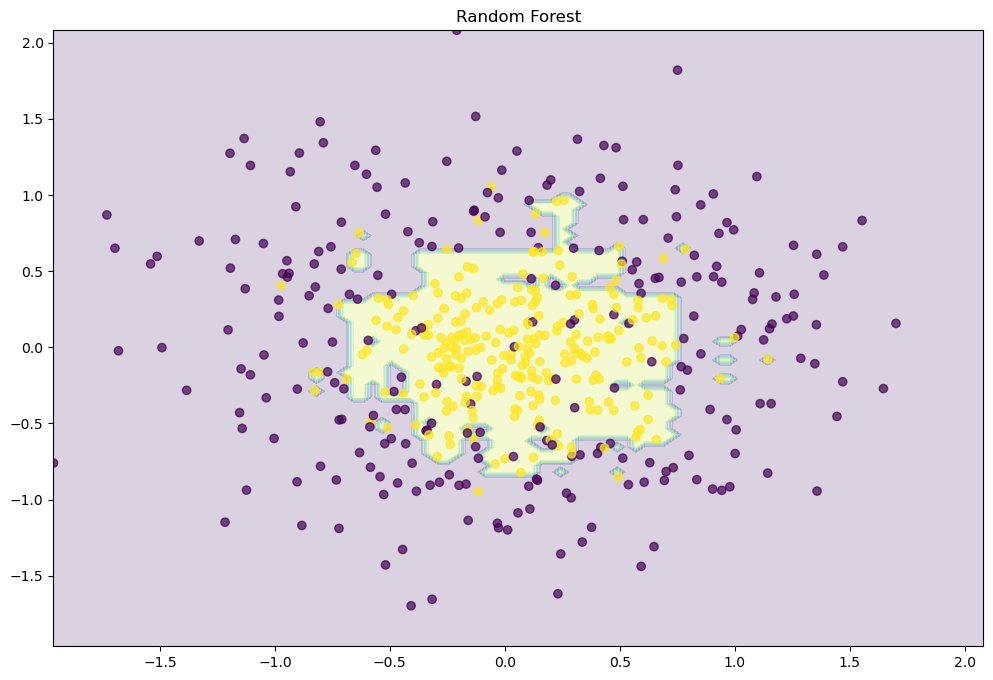

In [17]:
plt.figure(figsize=(12,8))
x_range= np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'viridis', alpha=0.7)
plt.title('Random Forest')

### In case of regression

In [18]:
n_train = 150
n_test = 1000
noise =0.1

In [23]:
def f(x):
    x = x.ravel()
    return np.exp(-x**2) + 1.5 *np.exp(-(x-2)**2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples)*10-5
    X = np.sort(X).ravel()
    y = np.exp(-X **2) + 1.5 *np.exp(-(X-2)**2)+ np.random.normal(0.0, noise, n_samples)
    X= X.reshape((n_samples,1))
    return X,y

In [24]:
X_train, y_train = generate(n_samples =n_train, noise = noise)
X_test, y_test = generate(n_samples= n_test, noise = noise)

(-5.0, 5.0)

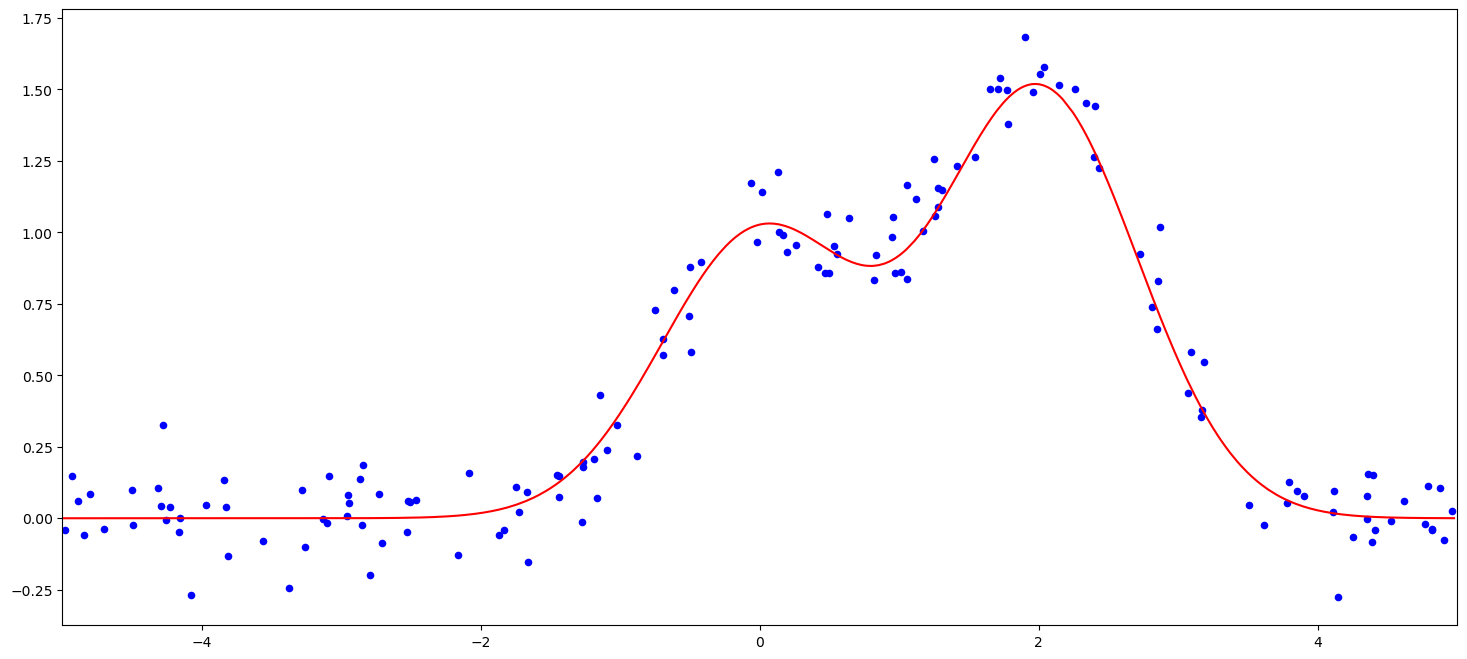

In [25]:
plt.figure(figsize=(18,8))
plt.plot(X_test, f(X_test), 'r')
plt.scatter(X_train, y_train, c ='b', s =20)
plt.xlim([-5,5])

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

Text(0.5, 1.0, 'Decision Tree, MSE = 23.78')

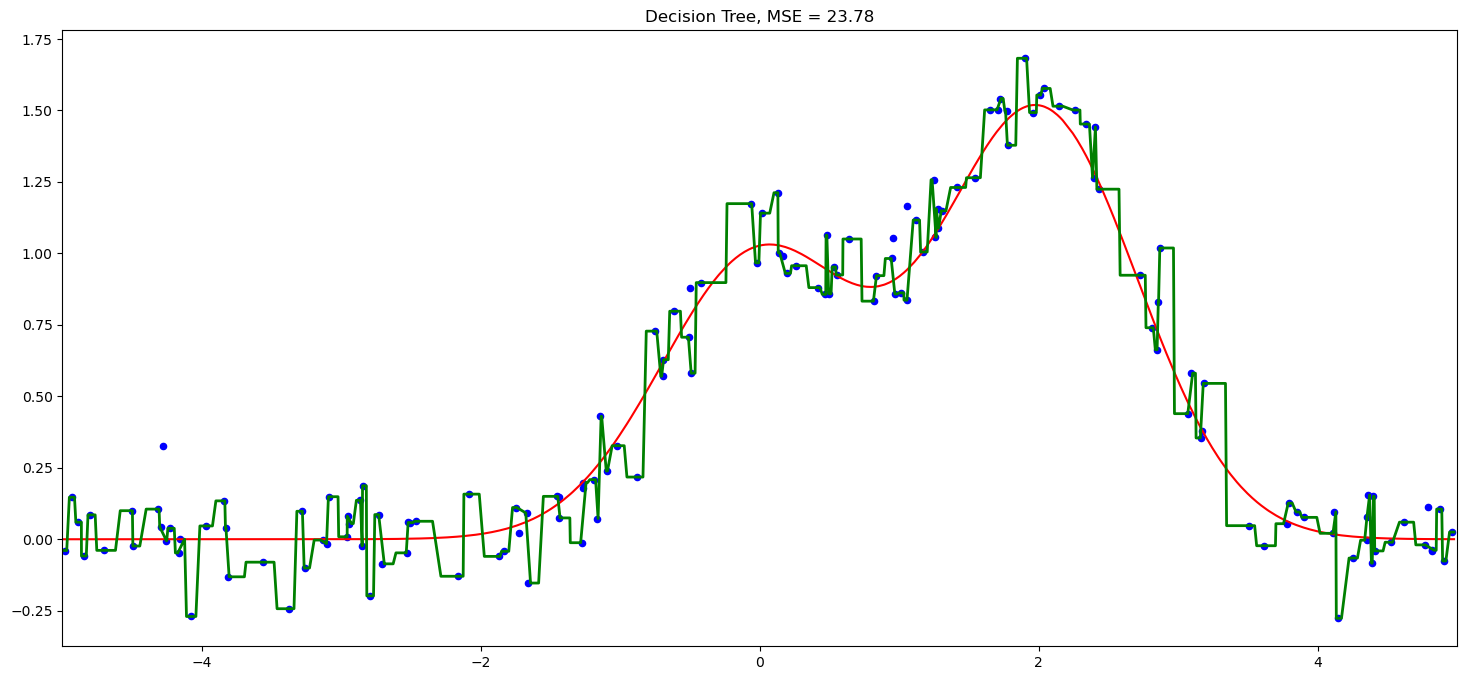

In [27]:
plt.figure(figsize=(18,8))
plt.plot(X_test, f(X_test), 'r')
plt.scatter(X_train, y_train, c ='b', s =20)
plt.plot(X_test, d_predict, 'g', lw=2)
plt.xlim([-5,5])
plt.title('Decision Tree, MSE = %.2f' %np.sum((y_test - d_predict)**2))

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000).fit(X_train,y_train)
rf_predict = rf.predict(X_test)

Text(0.5, 1.0, 'Random Forest, MSE = 15.91')

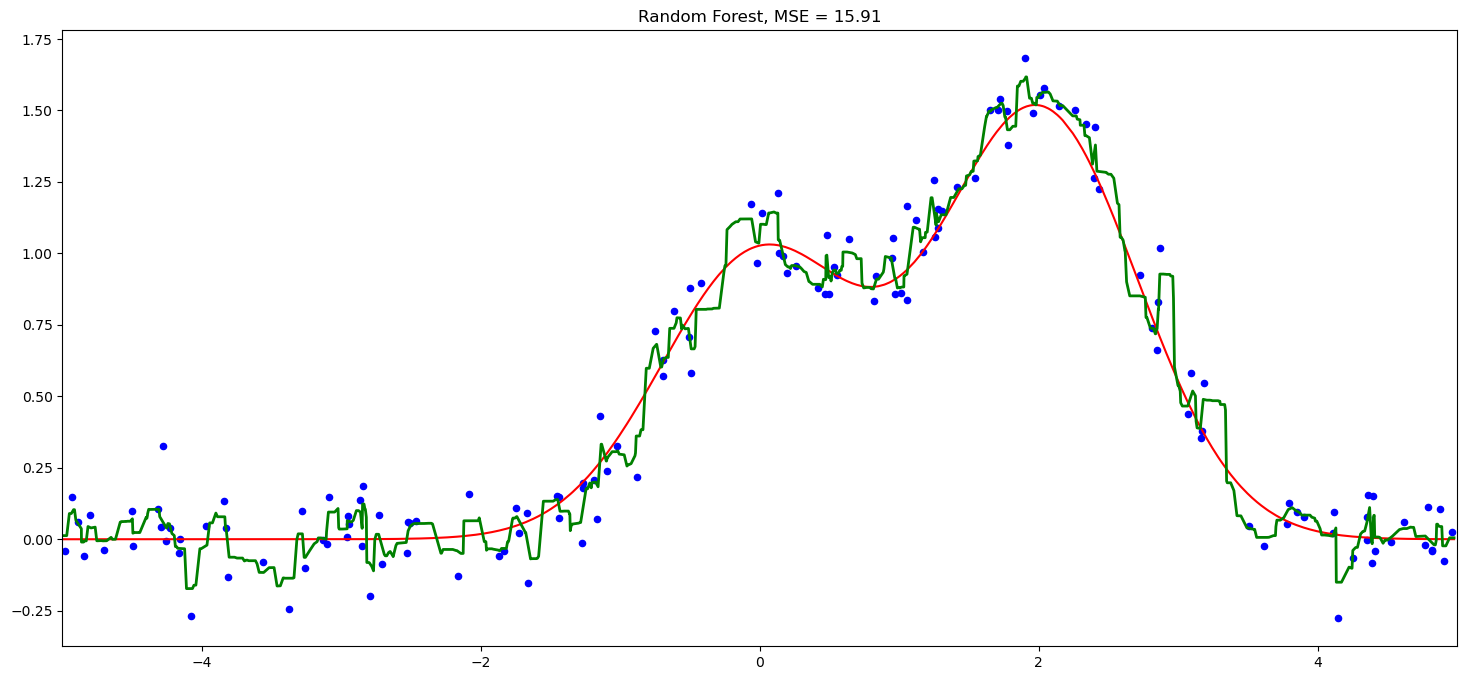

In [30]:
plt.figure(figsize=(18,8))
plt.plot(X_test, f(X_test), 'r')
plt.scatter(X_train, y_train, c ='b', s =20)
plt.plot(X_test, rf_predict, 'g', lw=2)
plt.xlim([-5,5])
plt.title('Random Forest, MSE = %.2f' %np.sum((y_test - rf_predict)**2))